In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = '/content/IT Salary Survey EU 2020.csv'
df= pd.read_csv(url)
df

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",...,72000,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes,NaN,NaN
1249,18/01/2021 17:46:02,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,1.5,Senior,consumer analysis,NaN,...,2500,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No,NaN,0
1250,18/01/2021 23:20:35,39.0,Male,Munich,IT Operations Manager,15,2,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",...,NaN,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No,NaN,NaN
1251,19/01/2021 10:17:58,26.0,Male,Saarbrücken,Frontend Developer,7,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",...,36400,27,Full-time employee,Unlimited contract,German,101-1000,Product,No,NaN,0


# **PARTE 1**

# **1 – limpiar datos(eliminar columnas innecesarias, filas e imputar con la mediana).**

In [ ]:
# Eliminar columnas innecesarias
columnas_innecesarias = ['Years of experience in Germany', 'Number of vacation days' ,'Employment status',
                         'Сontract duration', 'Main language at work', 'Yearly bonus + stocks in EUR',
                         'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country' ,
                         'Annual bonus+stocks one year ago. Only answer if staying in same country' ,
                         'Have you lost your job due to the coronavirus outbreak?',
                         'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
                         'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR']
df = df.drop(columnas_innecesarias, axis=1)

In [ ]:
df

,Timestamp,Age,Gender,City,Position,Total years of experience,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Company size,Company type
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,51-100,Product
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,Senior,Ruby,NaN,80000.0,101-1000,Product
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,101-1000,Product
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,Junior,Javascript,NaN,54000.0,51-100,Startup
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,101-1000,Product
...,...,...,...,...,...,...,...,...,...,...,...,...
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",70000.0,51-100,Product
1249,18/01/2021 17:46:02,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,Senior,consumer analysis,NaN,60000.0,1000+,Product
1250,18/01/2021 23:20:35,39.0,Male,Munich,IT Operations Manager,15,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",110000.0,101-1000,eCommerce
1251,19/01/2021 10:17:58,26.0,Male,Saarbrücken,Frontend Developer,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",38350.0,101-1000,Product


In [ ]:
# Imputar valores faltantes con la mediana
columnas_con_faltantes = ['Age']
for columna in columnas_con_faltantes:
    mediana = df[columna].median()
    df[columna].fillna(mediana, inplace=True)

In [ ]:
# Eliminar filas con valores NaN
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010 entries, 0 to 1252
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Timestamp                                               1010 non-null   object 
 1   Age                                                     1010 non-null   float64
 2   Gender                                                  1010 non-null   object 
 3   City                                                    1010 non-null   object 
 4   Position                                                1010 non-null   object 
 5   Total years of experience                               1010 non-null   object 
 6   Seniority level                                         1010 non-null   object 
 7   Your main technology / programming language             1010 non-null   object 
 8   Other technologies/programming languag

In [ ]:
salarios = df['Yearly brutto salary (without bonus and stocks) in EUR']

# **2 – Dibujar el histograma de distribución para el salario. Indicar Media y mediana.¿La mediana y la media son similares? ¿por qué?**

In [ ]:
media = salarios.mean()
mediana = salarios.median()

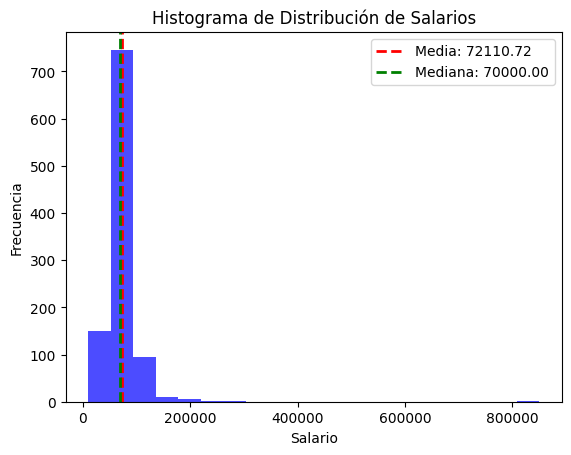

In [ ]:
plt.hist(salarios, bins=20, color='blue', alpha=0.7)
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.title('Histograma de Distribución de Salarios')
plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana:.2f}')
plt.legend()
plt.show()

In [ ]:
print(f"Media: {media:.2f}")
print(f"Mediana: {mediana:.2f}")

Media: 74559.50
Mediana: 74000.00


**Respuesta:**La media y la mediana son bastante cercanos entre sí, entonces la distribución de salarios puede ser relativamente simétrica y no esta fuertemente sesgada, y como se puede observar en la grafica, esta tiene forma de campana

# **3 – Dibujar diagrama de cajas para la distribución del salario. ¿Hay datos outliers? ¿cuales?**

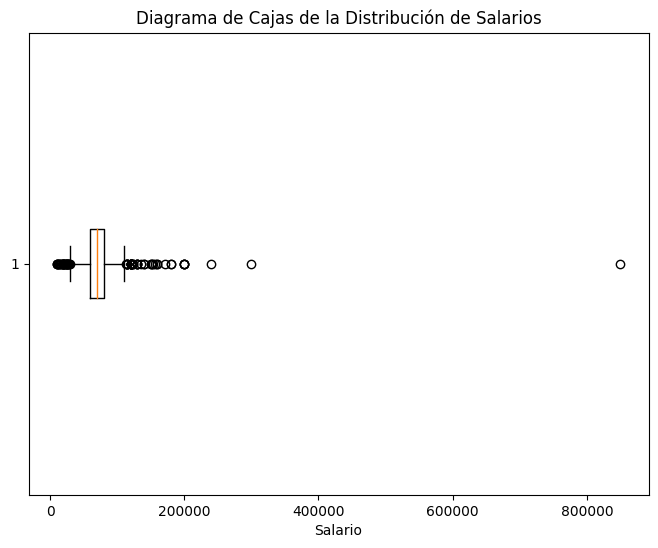

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(salarios, vert=False)
plt.xlabel('Salario')
plt.title('Diagrama de Cajas de la Distribución de Salarios')
plt.show()

In [ ]:
Q1 = salarios.quantile(0.25)
Q3 = salarios.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Calcular límites para los bigotes
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [ ]:
# Identificar valores atípicos
outliers = salarios[(salarios < limite_inferior) | (salarios > limite_superior)]
print("Valores atípicos:")
print(outliers)
plt.show()

Valores atípicos:
2       120000.0
35      150000.0
107     120000.0
141     120000.0
167      28000.0
          ...   
1155     17500.0
1209     16320.0
1223    200000.0
1234     20000.0
1235     20000.0
Name: Yearly brutto salary (without bonus and stocks) in EUR, Length: 71, dtype: float64


**Respuesta:** Con la ayuda del diagrama de cajas, se puede observar la precensia de datos atipicos, ya luego haciendo el calculo, se concluyo que hay 71 datos atipicos( o outliers) en el dataset

# **4 – Agregar una columna que indique si alguien tiene un salario bruto mayor al tercer cuantil.**

In [ ]:
df['Salario_Mayor_Q3'] = (salarios > Q3)
df

,Timestamp,Age,Gender,City,Position,Total years of experience,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Company size,Company type,Salario_Mayor_Q3
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,51-100,Product,False
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,101-1000,Product,True
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,101-1000,Product,False
5,24/11/2020 11:15:53,32.0,Male,Berlin,DevOps,5,Senior,"AWS, GCP, Python,K8s","Python, AWS, Google Cloud, Kubernetes, Docker",76000.0,11-50,Startup,False
7,24/11/2020 11:16:44,24.0,Male,Berlin,Frontend Developer,5,Senior,Typescript,Javascript / Typescript,65000.0,1000+,Product,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,18/01/2021 11:50:02,34.0,Male,Zurich,Software Engineer,7,Senior,PHP,PHP,108500.0,11-50,Startup,True
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",70000.0,51-100,Product,False
1250,18/01/2021 23:20:35,39.0,Male,Munich,IT Operations Manager,15,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",110000.0,101-1000,eCommerce,True
1251,19/01/2021 10:17:58,26.0,Male,Saarbrücken,Frontend Developer,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",38350.0,101-1000,Product,False


# **5 – Dibujar tabla de contingencia y determinar:**
- ¿Cuál es la probabilidad de tener un salario mayor al  tercer cuartil dado qué es hombre?

- ¿Cuál es la probabilidad de tener un salario mayor al  tercer cuartil dado qué es mujer?

- ¿Cuál es la probabilidad de  ser hombre dado que gana más del tercer cuartil?

- ¿Cuál es la probabilidad de  ser mujer dado que gana más del tercer cuartil?

In [ ]:
tabla_contingencia = pd.crosstab(df['Gender'], df['Salario_Mayor_Q3'], margins=True, margins_name="Total")

In [ ]:
probabilidad_hombre_mayor_Q3 = tabla_contingencia.loc['Male', True] / tabla_contingencia.loc['Male', "Total"]
probabilidad_mujer_mayor_Q3 = tabla_contingencia.loc['Female', True] / tabla_contingencia.loc['Female', "Total"]
probabilidad_hombre_dado_mayor_Q3 = tabla_contingencia.loc['Male', True] / tabla_contingencia.loc['Total', True]
probabilidad_mujer_dado_mayor_Q3 = tabla_contingencia.loc['Female', True] / tabla_contingencia.loc['Total', True]

In [ ]:
print("Tabla de Contingencia:")
print(tabla_contingencia)
print("\nProbabilidad de tener un salario mayor al tercer cuartil dado que es hombre:", probabilidad_hombre_mayor_Q3)
print("Probabilidad de tener un salario mayor al tercer cuartil dado que es mujer:", probabilidad_mujer_mayor_Q3)
print("Probabilidad de ser hombre dado que gana más del tercer cuartil:", probabilidad_hombre_dado_mayor_Q3)
print("Probabilidad de ser mujer dado que gana más del tercer cuartil:", probabilidad_mujer_dado_mayor_Q3)

Tabla de Contingencia:
Salario_Mayor_Q3  False  True  Total
Gender                              
Diverse               0     2      2
Female              124     4    128
Male                652   228    880
Total               776   234   1010

Probabilidad de tener un salario mayor al tercer cuartil dado que es hombre: 0.2590909090909091
Probabilidad de tener un salario mayor al tercer cuartil dado que es mujer: 0.03125
Probabilidad de ser hombre dado que gana más del tercer cuartil: 0.9743589743589743
Probabilidad de ser mujer dado que gana más del tercer cuartil: 0.017094017094017096


# **6 – Dibujar tabla de contingencia y determinar:**
   
- ¿Cuál es la probabilidad de tener un salario mayor al  tercer cuartil dado que programa en Python?

- ¿Cuál es la probabilidad de tener un salario mayor al  tercer cuartil dado que programa en otro lenguaje diferente de python?


In [ ]:
df['Programa_Python'] = df['Your main technology / programming language'].str.contains('Python', case=False)

In [ ]:
tabla_contingencia = pd.crosstab(df['Programa_Python'], df['Salario_Mayor_Q3'], margins=True, margins_name="Total")

In [ ]:
probabilidad_programa_python_mayor_Q3 = tabla_contingencia.loc[True, True] / tabla_contingencia.loc[True, "Total"]
probabilidad_programa_otro_lenguaje_mayor_Q3 = tabla_contingencia.loc[False, True] / tabla_contingencia.loc[False, "Total"]

In [ ]:
print("Tabla de Contingencia:")
print(tabla_contingencia)
print("\nProbabilidad de tener un salario mayor al tercer cuartil dado que programa en Python:", probabilidad_programa_python_mayor_Q3)
print("Probabilidad de tener un salario mayor al tercer cuartil dado que programa en otro lenguaje diferente de Python:", probabilidad_programa_otro_lenguaje_mayor_Q3)

Tabla de Contingencia:
Salario_Mayor_Q3  False  True  Total
Programa_Python                     
False               609   182    791
True                167    52    219
Total               776   234   1010

Probabilidad de tener un salario mayor al tercer cuartil dado que programa en Python: 0.2374429223744292
Probabilidad de tener un salario mayor al tercer cuartil dado que programa en otro lenguaje diferente de Python: 0.23008849557522124


#**7. Dibujar el diagrama de cajas de los salarios vs el género. ¿Hay alguna diferencia en la distribución de los salarios recibidos por género? Justificar**


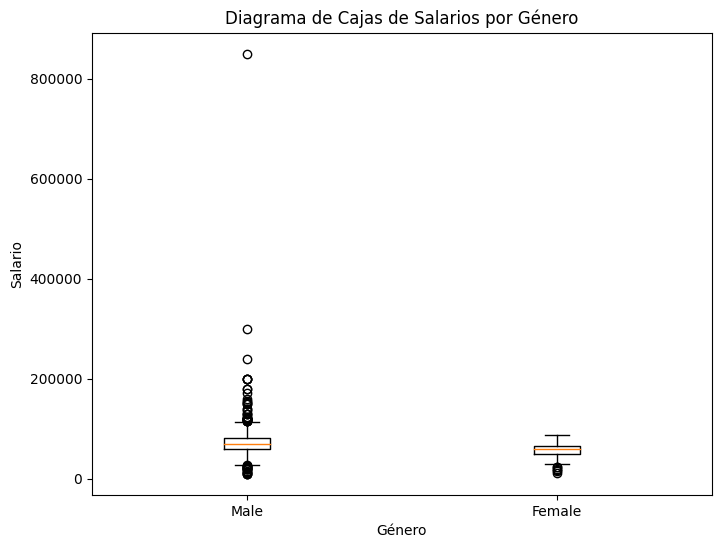

In [ ]:
data = pd.DataFrame({'Salario': salarios, 'Género': df['Gender']})

plt.figure(figsize=(8, 6))
plt.boxplot([data[data['Género'] == 'Male']['Salario'], data[data['Género'] == 'Female']['Salario']], labels=['Male', 'Female'])
plt.xlabel('Género')
plt.ylabel('Salario')
plt.title('Diagrama de Cajas de Salarios por Género')
plt.show()

**Respuesta**: Como se puede ver en la grafica, si hay bastante dispersion entre el salario de hombres al de mujeres, aunque en promedio las muejeres ganan mas que los hombres, los hombres son los que tienen los salarios mas altos, esto puede sucedes debido a que los hombres tienen mayores rangos que las mujeres.
Y como se puede ver en la comprobación, hay mas hombres en el rango senior, que mujeres, de ahi nace que los salarios mas altos sean de los hombres. Incluso en los demas puestos, hay mayor precencia masculina que femenina

**- Repetir paso anterior teniendo en cuenta sólo a los programadores senior.**

In [ ]:
df_senior = df[df['Seniority level'] == 'Senior']

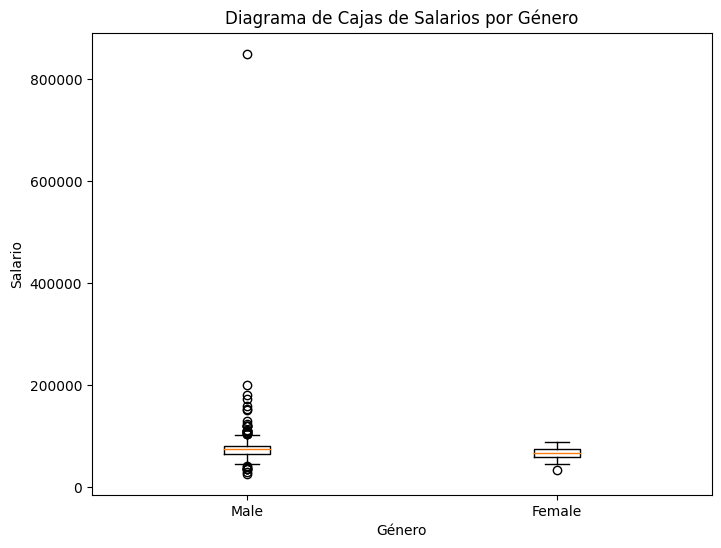

In [ ]:
data = pd.DataFrame({'Salario': df_senior['Yearly brutto salary (without bonus and stocks) in EUR'], 'Género': df_senior['Gender']})

plt.figure(figsize=(8, 6))
plt.boxplot([data[data['Género'] == 'Male']['Salario'], data[data['Género'] == 'Female']['Salario']], labels=['Male', 'Female'])
plt.xlabel('Género')
plt.ylabel('Salario')
plt.title('Diagrama de Cajas de Salarios por Género')
plt.show()

# **8. ¿Existe alguna correlación entre la edad y el salario? Justificar**

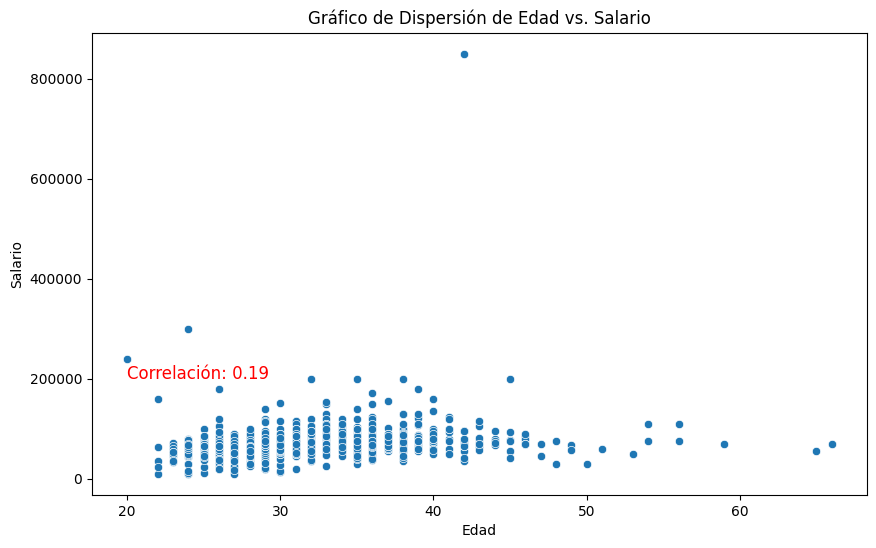

Coeficiente de correlación de Pearson: 0.19


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Yearly brutto salary (without bonus and stocks) in EUR')
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.title('Gráfico de Dispersión de Edad vs. Salario')

correlacion = df['Age'].corr(df['Yearly brutto salary (without bonus and stocks) in EUR'])

plt.text(20, 200000, f'Correlación: {correlacion:.2f}', fontsize=12, color='red')

plt.show()

print(f"Coeficiente de correlación de Pearson: {correlacion:.2f}")

**Respuesta**: Cuando la edad aumenta el salario aumenta levemente, es decir, hay una correlacion muy debil entre la edad que tiene y el salario que se gana, por lo que se puede concluir que la edad que tiene no afecta el salario que gana.

# **PARTE 2**

# **Calcular el promedio de salario por cada tipo de compañia**

In [ ]:
promedio_salario_por_tipo_empresa = df.groupby('Company type')['Yearly brutto salary (without bonus and stocks) in EUR'].mean()
promedio_salario_por_tipo_empresa = promedio_salario_por_tipo_empresa.sort_values(ascending=False)
print(promedio_salario_por_tipo_empresa)

Company type
freelance                                                                   200000.000000
Cloud                                                                       120000.000000
Concern                                                                     120000.000000
Pharma                                                                      115000.000000
Corporation                                                                 113000.000000
eCommerce                                                                   110000.000000
Media                                                                       106000.000000
Corporation                                                                 105000.000000
Construction                                                                 89200.000000
Enterprise                                                                   85000.000000
IT Department of established business                                        84000.0000

**Respuesta**: Se puede ver la alta variedad de salarios que hay entre los diferente tipos de compañia. Las categorías relacionadas con la tecnología, como "Cloud," "Pharma," "E-commerce," y "SaaS," tienden a tener salarios promedio más altos en comparación con algunas otras categorías. Las categorías relacionadas con la educación, como "Education" y "University," así como "Behörde", tienden a tener salarios promedio más bajos en comparación con otras categorías.

# **Calcular el promedio de salario por cada Rango de puesto**

In [ ]:
promedio_salario_por_seniority = df.groupby('Seniority level')['Yearly brutto salary (without bonus and stocks) in EUR'].mean()
promedio_salario_por_seniority = promedio_salario_por_seniority.sort_values(ascending=False)
print(promedio_salario_por_seniority)

Seniority level
Self employed                                200000.000000
CTO                                          200000.000000
C-Level                                      150000.000000
C-level executive manager                    115000.000000
Head                                         105015.625000
Director                                     100000.000000
VP                                           100000.000000
Manager                                       89200.000000
Principal                                     88500.000000
Lead                                          87754.855072
Senior                                        76022.138298
no idea, there are no ranges in the firm      70000.000000
Middle                                        58586.872414
Entry level                                   54179.130000
Junior                                        51366.625000
Intern                                        35000.000000
intern                                  

**Respuesta**: Se puede ver la alta variedad de salarios que hay entre los diferente tipos de rangos. Los niveles de seniority relacionados con roles ejecutivos, como "self employeed" y "CTO," tienden a tener los salarios promedio más altos.Los niveles de "Student", "Intern" y "Working Student" tienen salarios promedio significativamente más bajos en comparación con otros niveles.

# **Cantidad y porporción de personas en cada Rango, categorizado por genero**

In [ ]:
conteo_por_genero_seniority = df.groupby(['Seniority level', 'Gender']).size().unstack(fill_value=0)

total_hombres = conteo_por_genero_seniority['Male'].sum()
total_mujeres = conteo_por_genero_seniority['Female'].sum()

conteo_por_genero_seniority['Porcentaje Hombres'] = (conteo_por_genero_seniority['Male'] / total_hombres) * 100
conteo_por_genero_seniority['Porcentaje Mujeres'] = (conteo_por_genero_seniority['Female'] / total_mujeres) * 100

print(conteo_por_genero_seniority[['Porcentaje Hombres', 'Porcentaje Mujeres']])

Gender                                     Porcentaje Hombres  \
Seniority level                                                 
C-Level                                              0.113636   
C-level executive manager                            0.113636   
CTO                                                  0.113636   
Director                                             0.113636   
Entry level                                          0.113636   
Head                                                 3.409091   
Intern                                               0.113636   
Junior                                               5.113636   
Lead                                                15.113636   
Manager                                              0.113636   
Middle                                              25.909091   
Principal                                            0.227273   
Self employed                                        0.113636   
Senior                   

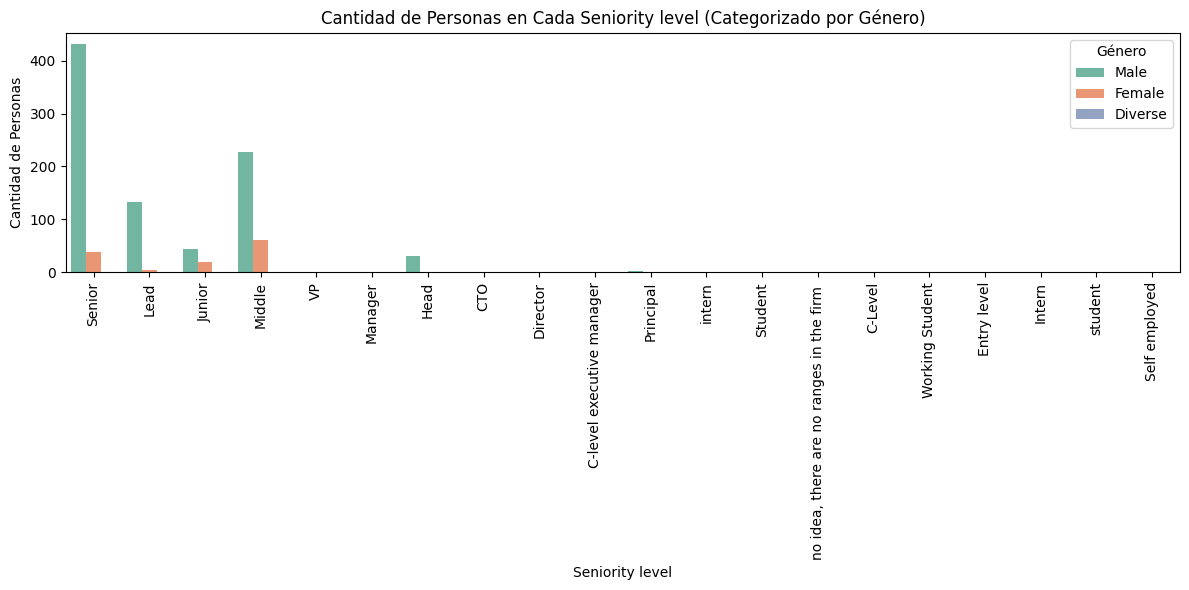

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Seniority level', hue='Gender', palette='Set2')
plt.xlabel('Seniority level')
plt.ylabel('Cantidad de Personas')
plt.title('Cantidad de Personas en Cada Seniority level (Categorizado por Género)')
plt.xticks(rotation=90)
plt.legend(title='Género')
plt.tight_layout()
plt.show()

**Respuesta:** Se puede denotar que en la gran maoyria de puestos, la precencia masculina es mayor a la femenina, se debe tambien a la mayor precencia de hombres en la poblacion de dataset, pero a excepcion de Middle y Junior, la prencia de hombres con respecto a mujeres en relacion a su propocion es bastante dispareja. Indicando que cerca de la mitad de las mujeres estan de middle, y cerca a la mitad de hombres esta de Senior, esto indicaria el porque tambien existe una diferencia de salario importante

# **Cantidad de personas por lenguaje, y salario promedio que tiene cada lenguaje**

In [ ]:
promedio_salario_por_lenguaje = df.groupby('Your main technology / programming language')['Yearly brutto salary (without bonus and stocks) in EUR'].mean()
promedio_salario_por_lenguaje = promedio_salario_por_lenguaje.sort_values(ascending=False)
print(promedio_salario_por_lenguaje)

Your main technology / programming language
React JS                         850000.0
.net, c++, spss, embeddded       200000.0
JAVA                             200000.0
Cobol                            159000.0
Java & PHP                       150000.0
                                   ...   
Tricentis Tosca                   32000.0
FBD                               30000.0
GCP                               30000.0
Web developer                     27000.0
Python, database technologies     16320.0
Name: Yearly brutto salary (without bonus and stocks) in EUR, Length: 225, dtype: float64


In [ ]:
conteo_por_lenguaje = df['Your main technology / programming language'].value_counts()
conteo_por_lenguaje = conteo_por_lenguaje.sort_values(ascending=False)
print(conteo_por_lenguaje)

Java                                            159
Python                                          153
PHP                                              50
C++                                              34
JavaScript                                       31
                                               ... 
PL/SQL                                            1
Swift, Objective-C                                1
Python, Whole Apache Data Science Stack, AWS      1
NLP, Python                                       1
spark                                             1
Name: Your main technology / programming language, Length: 225, dtype: int64


**Respuesta:** Se puede evidenciar que el lenguaje que mas paga es React JS. Tambien que el lenguaje mas utilizado es Java, siendo este tambien uno de los mejores pagados, o sea, se puede decir que en promedio es mejor aprender Java y aplicar para el, puede que haya mucho competencia, pero tiene un elevado salario tambien

# **CONCLUSIONES**
* Los salarios varían significativamente según el nivel de seniority, con los niveles ejecutivos  teniendo los salarios más altos, seguidos por niveles como Principal, Lead y Senior.
* Los niveles de entrada y junior tienen salarios más bajos en comparación con otros niveles, lo que es típico para roles menos experimentados.
* Existe una brecha salarial de género, con salarios promedio más altos para hombres que para mujeres en general.
* Los salarios varían significativamente según el tipo de empresa. Las startups y las empresas tecnológicas tienden a ofrecer salarios más altos en promedio, mientras que las instituciones académicas y algunas empresas de servicios públicos tienen salarios más bajos en promedio.
* Los salarios también varían según el lenguaje de programación utilizado. Algunos lenguajes de programación están asociados con salarios más altos en promedio que otros.
* La distribución de salarios es asimétrica y sesgada hacia la derecha, lo que significa que hay un pequeño número de salarios muy altos que influyen en la media, haciendo que sea mayor que la mediana.
* La mediana y la media son diferentes debido a la presencia de valores atípicos en los datos. La mediana es una medida de tendencia central más robusta en este caso.